In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import string

In [13]:
df = pd.read_csv("train2.csv")

In [14]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [15]:
df.drop(["UserName","ScreenName","Location","TweetAt"],axis = 1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [16]:
df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [17]:
#distributions
#Negative = 1, neutral = 2, positive = 3
df_Stat=df[['Sentiment','OriginalTweet']].groupby('Sentiment').count().reset_index()
df_Stat.columns=['Sentiment','count']
df_Stat['percentage']=(df_Stat['count']/df_Stat['count'].sum())*100
df_Stat

,Sentiment,count,percentage
0,Extremely Negative,5481,13.317297
1,Extremely Positive,6624,16.094468
2,Negative,9917,24.095537
3,Neutral,7713,18.740433
4,Positive,11422,27.752266


In [18]:
df.replace({"Extremely Negative":"Negative","Extremely Positive":"Positive"},inplace=True)

In [19]:
#distributions
#Negative = 1, neutral = 2, positive = 3
df_Stat=df[['Sentiment','OriginalTweet']].groupby('Sentiment').count().reset_index()
df_Stat.columns=['Sentiment','count']
df_Stat['percentage']=(df_Stat['count']/df_Stat['count'].sum())*100
df_Stat

,Sentiment,count,percentage
0,Negative,15398,37.412834
1,Neutral,7713,18.740433
2,Positive,18046,43.846733


In [20]:
df.drop(df[df['Sentiment']=='Neutral'].index,inplace=True)

In [21]:
#distributions
#Negative = 1, neutral = 2, positive = 3
df_Stat=df[['Sentiment','OriginalTweet']].groupby('Sentiment').count().reset_index()
df_Stat.columns=['Sentiment','count']
df_Stat['percentage']=(df_Stat['count']/df_Stat['count'].sum())*100
df_Stat

,Sentiment,count,percentage
0,Negative,15398,46.041143
1,Positive,18046,53.958857


In [22]:
import tweepy
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Emre
[nltk_data]     Eser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Emre
[nltk_data]     Eser\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
def load_dict_contractions():    
    return {
        "cant":"can not",
        "dont":"do not",
        "wont":"will not",
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "i've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "couldn't":"could not",
        "wouldn't":"would not",
        "shouldn't":"should not",
        "im":"i am"
        }


stop_words = set(stopwords.words('english'))-set(['not', 'no'])

def normalization(text):
    text = text.lower()
    # Number
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
    text = ''.join([i for i in text if not i.isdigit()])      
    
    for sym in string.punctuation:
        text = text.replace(sym, " ")
    
    # Contraction
    CONTRACTIONS = load_dict_contractions()
    text = text.replace("’","'")
    words = text.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    text = " ".join(reformed)
    
    #removing stop words 
    text = " ".join([word for word in text.split() if not word in stop_words])
    #removing single characters (etc: i/I)
    text = ' '.join( [w for w in text.split() if len(w)>1 and w != 'a' and w != 'i'])   
    
    return text

In [24]:
df['OriginalTweet'] = df['OriginalTweet'].apply(normalization)

In [25]:
df.head()

,OriginalTweet,Sentiment
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia woolworths give elderly ...,Positive
3,food stock not one empty please panic enough f...,Positive
4,ready go supermarket outbreak not paranoid foo...,Negative
5,news regions first confirmed covid case came ...,Positive


In [26]:
#creating new column Sentiment, which has 1 and 0 values(change pozitive=1,negative=0)
df['sentiment']=np.where(df['Sentiment']=='Positive',1,0)
#deleting sentiment column(ec. positive)
df.drop('Sentiment',axis=1,inplace=True)
df.head()

,OriginalTweet,sentiment
1,advice talk neighbours family exchange phone n...,1
2,coronavirus australia woolworths give elderly ...,1
3,food stock not one empty please panic enough f...,1
4,ready go supermarket outbreak not paranoid foo...,0
5,news regions first confirmed covid case came ...,1


In [27]:
#Writing function for words visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def wordcloud_draw(data, color = 'black'):
    
    wordcloud = WordCloud(background_color=color,
                      width=2500,
                      height=2000
                     ).generate(str(data))
    plt.figure(1,figsize=(15, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [28]:
positive=df[df['sentiment']==1]
negative=df[df['sentiment']==0]
#return top 100 words with highest frequency
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    most = wordlist.most_common(100)
    return most

Negative Tweets


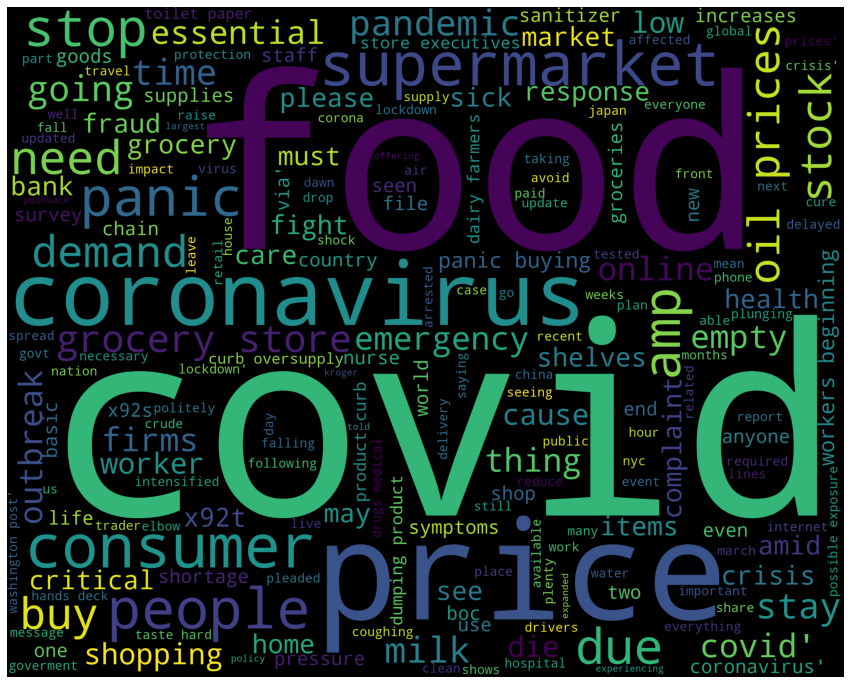

In [21]:
#word cloud for negative review words
print('Negative Tweets')
wordcloud_draw(get_word_features(negative['OriginalTweet']))

Positive Tweets


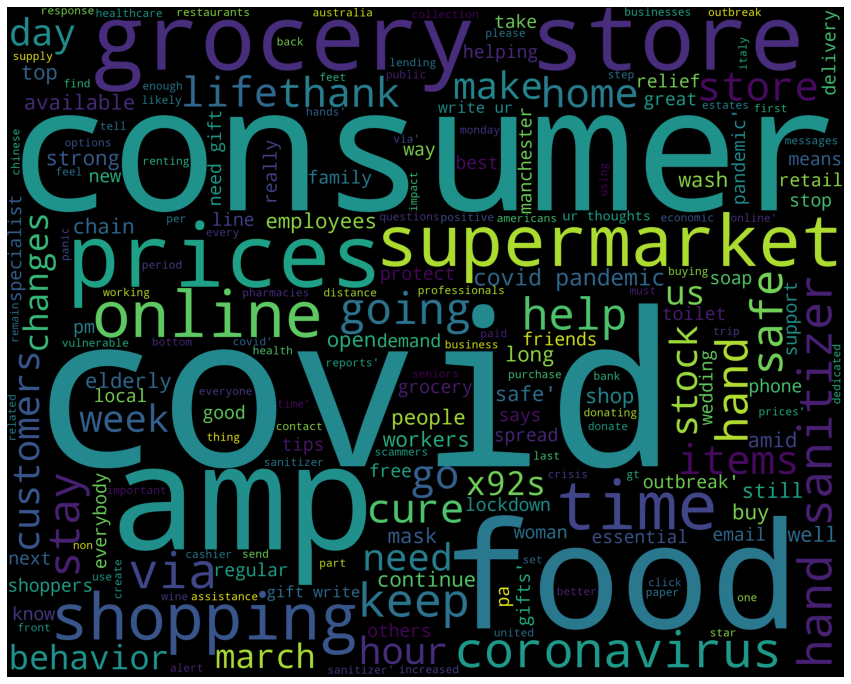

In [22]:
#word cloud for negative review words
print('Positive Tweets')
wordcloud_draw(get_word_features(positive['OriginalTweet']))

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
y=df.sentiment.values
X=tfidf.fit_transform(df.OriginalTweet)

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred= classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8687397219315294

In [137]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)
# Predicting the Test set results
y_pred2 = classifier2.predict(X_test)
accuracy_score(y_test, y_pred2)

0.7645387950366273

In [138]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)
# Predicting the Test set results
y_pred3= classifier3.predict(X_test)
accuracy_score(y_test, y_pred3)

0.8005680968754672

In [139]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier4.fit(X_train, y_train)
# Predicting the Test set results
y_pred4 = classifier4.predict(X_test)
accuracy_score(y_test, y_pred4)

0.712961578711317

In [33]:
from sklearn import svm
classifier5 = svm.SVC(C = 5 , kernel='rbf')
classifier5.fit(X_train, y_train)
y_pred5 = classifier5.predict(X_test)
accuracy_score(y_test, y_pred5)

0.8884736133951263

In [34]:
import tweepy
import numpy as np
import pandas as pd
#twitter process
consumer_key = "r3TujvvznVVfASi6tvg29Hrqm"
consumer_secret  = "AjnpgSg4umBjcF9lHR7aJ448WXlto8CPxcGHVhODVRO55gZKUE"
bearer_token = "AAAAAAAAAAAAAAAAAAAAACibKwEAAAAAdvvAjwZWgizutr3JFBF6OclQ%2FBY%3DpU2UBFn5i4PBuT1CXGzbjJZQo8c14TnBAWV60mA82kYaDjDryP"
access_token = "617994799-XCKRFwKXUg9MQc1ppHjDI0UT94YweC7qkAU2mQX0"
access_token_secret = "7mZZHk4kF2qZBlMbE0Ddkh6PaigAzuVjl157jruK9aVJl"

#obtaining tweets using API
search_words = "#CovidVaccine" + " -filter:retweets"
date_since = "2021-06-10"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

tweets = tweepy.Cursor(api.search,
              q=search_words,count=1000,
              lang="en",
              since=date_since, tweet_mode='extended').items(1000)

In [35]:
all_tweets = [tweet.full_text for tweet in tweets]
df_tweets = pd.DataFrame(all_tweets, columns = ['Tweets'])
print(df_tweets.shape)
df_tweets.head(10)


(1000, 1)


,Tweets
0,. #vaccination #CovidVaccine \n\nIf yo...
1,Bait &amp; switch! It's one gigantic #covidsca...
2,This is the most powerful thing I’ve seen in a...
3,"""After she got it, she said, 'Mom you were rig..."
4,"Happy Independence Day, My American Darlings, ..."
5,#CovidVaccine #ToryCovidCatastrophe Stop priv...
6,Likely 3 in 10 American adults are just stupid...
7,"""Are the adults of this country truly supporti..."
8,Media Statement || Gauteng government launches...
9,#Canada to ease entry restrictions from July 5...


In [36]:
print("Predictions:")
print("***********")
pozitive_count=0
negative_count=0
for tweet in df_tweets.Tweets:
    print("Original Tweet: ", tweet)
    print("++++++++++")
    tweet = normalization(tweet)
    print("Clean Tweet: ", tweet)
    #transformed = tfidf.fit_transform([tweet])
    transformed = tfidf.transform([tweet])
    predictTweet = classifier5.predict(transformed)
    if(predictTweet==1):
        pozitive_count+=1
    else:
        negative_count+=1
    print("Predicted sentiment:", "POZITIVE" if predictTweet==1 else "NEGATIVE")
    print("------------------")

Predictions:
***********
Original Tweet:  .         #vaccination #CovidVaccine 

If you haven't been, 

                 G E T   V A C C I N A T E D

                    or catching #COVID19 
                         may be as easy
                            as catching 

                               a bus. https://t.co/OInuZee2PV
++++++++++
Clean Tweet:  catching may easy catching bus
Predicted sentiment: POZITIVE
------------------
Original Tweet:  Bait &amp; switch! It's one gigantic #covidscam! 
Stop tracking = No Cases. 
STOP TESTING = No Cases! #DeltaVariant Risk Is Murky Without CDC Tracking Cases in Vaccinated People #COVID19 #CovidVaccine #COVID19Vaccine https://t.co/yhbtjHMhfP
++++++++++
Clean Tweet:  bait amp switch one gigantic stop tracking no cases stop testing no cases risk murky without cdc tracking cases vaccinated people
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  This is the most powerful thing I’ve seen in a while #CovidVaccine https://t.co/

Predicted sentiment: NEGATIVE
------------------
Original Tweet:  🚨 Orlando 💉  Vaccine site open every day until the 5th of July 🚨
✅ Your migrant status does not matter
✅ Your country of origin does not matter
✅ No appointment required!
🆓 Pfizer 💉 Johnson &amp; Johnson
✅ Please read flyer for details
#ConsulMexOrl #Orlando #CovidVaccine https://t.co/3jOP5Gjkiu
++++++++++
Clean Tweet:  orlando vaccine site open every day th july migrant status not matter country origin not matter no appointment required pfizer johnson amp johnson please read flyer details
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  India's Covid vax coverage crosses 35 Cr-mark 

#COVID19 #CovidVaccine

https://t.co/228npCH4kB
++++++++++
Clean Tweet:  india covid vax coverage crosses cr mark
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  Live in #sussex? Ready to #GrabAJab? Find out where you can get the #CovidVaccine today here 👇 #maxthevax @Sussex_HCP @WSCCNews @BrightonHoveCC @

Predicted sentiment: POZITIVE
------------------
Original Tweet:  #TheCoronasaurusStories hard copy purchase by friend #Germany!And my neighbour’s lovely reviews
#Covid19 #Coronavirus #stories #books #bookreview #bookstagram #booklover #kindlebooks #amazonbook #covidindia #covid_19 #CoronaCheck #CovidVaccine #book #BookReview #readingcommunity https://t.co/2mMADeFEmK
++++++++++
Clean Tweet:  hard copy purchase friend neighbour's lovely reviews
Predicted sentiment: POZITIVE
------------------
Original Tweet:  COVID-19 is still a threat to people who are unvaccinated. 

#CovidVaccine #Pakistan https://t.co/Wkqp4zUePG
++++++++++
Clean Tweet:  covid still threat people unvaccinated
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  Studies have shown that vaccination provides a strong boost in protection in people who have recovered from COVID-19

#CovidVaccine #Pakistan https://t.co/tBVuPSOGHw
++++++++++
Clean Tweet:  studies shown vaccination provides strong boost protecti

Predicted sentiment: POZITIVE
------------------
Original Tweet:  Mr. Haji Saif Shaikh ( Vice President, Maharashtra Navnirman Sena) felictated and thanked for his supprt to RUMI CARE VACCINATION DRIVE BY Dr. Akhtar Rizvi.
#COVID19 #CovidVaccine https://t.co/VHrc5mrBQA
++++++++++
Clean Tweet:  mr haji saif shaikh vice president maharashtra navnirman sena felictated thanked supprt rumi care vaccination drive dr akhtar rizvi
Predicted sentiment: POZITIVE
------------------
Original Tweet:  We're 16 months into the #chinavirus "pandemic" and Twitter twats are still insistent on #WearAMask, at a time when everyone and their brother is getting vaccinated. So are these lunatics insinuating that they don't trust the #CovidVaccine? 🙄
++++++++++
Clean Tweet:  months pandemic twitter twats still insistent time everyone brother getting vaccinated lunatics insinuating trust
Predicted sentiment: POZITIVE
------------------
Original Tweet:  Please beware! #Covid19India #CovidVaccine #vaccination htt

Predicted sentiment: POZITIVE
------------------
Original Tweet:  Can we just focus on celebrating vaccination without focusing on which vaccine? They are both effective. Stop confusing efficacy with side effects #auspol #CovidVaccine
++++++++++
Clean Tweet:  focus celebrating vaccination without focusing vaccine effective stop confusing efficacy side effects
Predicted sentiment: POZITIVE
------------------
Original Tweet:  US: Tiger, mountain lion &amp; bear receive COVID vaccine at Oakland Zoo. The vaccine has been especially made for animals. 

#COVID19 #COVIDVaccination
#covidvaccine #CoronaVirusUpdates
https://t.co/d2qAJdRBtl
++++++++++
Clean Tweet:  us tiger mountain lion amp bear receive covid vaccine oakland zoo vaccine especially made animals
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  #INDIAN #ARMY ORGANISES ONLINE AWARENESS ON #COVID19nsw  #Rajouri. #COVID19nsw #covidnsw #COVID19 #CovidVaccine #Covid #vaccinated #COVID #coronavirus #Covid_19 #BREAKING #

Predicted sentiment: POZITIVE
------------------
Original Tweet:  @PeteGodman More the tyrants pushing it,

And the lack of resistance from institutions that are meant to investigate stuff like this

The evidence points toward a conspiracy, but of course that makes me a conspiracy theorist and the media has already discredited them

#CovidVaccine
++++++++++
Clean Tweet:  tyrants pushing lack resistance institutions meant investigate stuff like evidence points toward conspiracy course makes conspiracy theorist media already discredited
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  Met with an ex colleague yesterday who’s a member of the BAME community, has already had Covid and yet doesn’t want to be vaccinated.  His reason? “Let the people who need it get theirs first”.  I wasn’t sure if this was noble or just bonkers? 🤔😷#VaccinesWork #CovidVaccine
++++++++++
Clean Tweet:  met ex colleague yesterday member bame community already covid yet not want vaccinated reason 

Predicted sentiment: POZITIVE
------------------
Original Tweet:  Bucket please. The cult is growing #Covid19UK #coronavirusuk #CovidVaccine #Propaganda #MasksOff https://t.co/xvdU1Q81iE
++++++++++
Clean Tweet:  bucket please cult growing
Predicted sentiment: POZITIVE
------------------
Original Tweet:  India wasted valuable info on 300 million COVID vaccine doses administered.
-Dr Gagandeep Kang, virologist at CMC Vellore and Karnataka’s advisor for vaccination protocols
#CovidVaccine #COVID19India 
https://t.co/k0k0foxtyE via @NewIndianXpress
++++++++++
Clean Tweet:  india wasted valuable info million covid vaccine doses administered dr gagandeep kang virologist cmc vellore karnataka's advisor vaccination protocols via
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  #ChrisWhitty said there is #20percent chance of survival with the #CovidVaccine for #highlyvulnerable people such as myself.  Therefore I have #80percent chance of dying also.  These may be my last tweet

Predicted sentiment: NEGATIVE
------------------
Original Tweet:  2nd Astra Zeneca Covid Vaccines available today between 10am and 2pm. Must have had first over 8 weeks ago(5th May or before). #llanelli #AstraZeneca #COVID19 #CovidVaccine #COVIDVaccination #swansea #Carmarthenshire
++++++++++
Clean Tweet:  nd astra zeneca covid vaccines available today pm must first weeks ago th may
Predicted sentiment: POZITIVE
------------------
Original Tweet:  https://t.co/R5p6b6ieHm 
#Marr 
#SundayMorning 
#BBCBreakfast 
#CovidVaccine 

B15000 bribe for myanmar labour to get into Thailand bringing  free gift of covíd !!

https://t.co/lxsmsOsOSB
++++++++++
Clean Tweet:  bribe myanmar labour get thailand bringing free gift covíd
Predicted sentiment: POZITIVE
------------------
Original Tweet:  Found her! https://t.co/ZcfAGou0XE
Who am I to question her? She is clearly sain, and it's her field. #CovidVaccine 

Cc @DrMadej
++++++++++
Clean Tweet:  found question clearly sain field cc
Predicted sentime

Predicted sentiment: NEGATIVE
------------------
Original Tweet:  Finally get vaccinated today. Looking forward for 2nd dose of covid vaccine .... Hope for the best always. #COVIDVaccination #1stdosecovid19vaccine #GetVaccinated  #CovidVaccine  #COVID19Vaccine #Covid_19 #COVID19
++++++++++
Clean Tweet:  finally get vaccinated today looking forward nd dose covid vaccine hope best always
Predicted sentiment: POZITIVE
------------------
Original Tweet:  @WUTMSpain @MichelleDewbs @BreesAnna @GillianMcKeith @JuliaHB1 @Janice4Brexit @AllisonPearson @sammy_lianne @RealDeniseWelch @IsabelOakeshott @IdiazAyuso @Jennifer_Arcuri @TalentedLadies @beverleyturner @ToniaBuxton #EUDRAVIGILANCE ~ The European Medical Agency's Database of #CovidVaccine reactions: 'Adverse Drug Reaction Reports'. 💉👀

#Pfizer  #AstraZeneca  #Moderna  #Johnson&amp;Johnson https://t.co/F1aEuhvBOP
++++++++++
Clean Tweet:  lianne arcuri european medical agency database reactions adverse drug reaction reports 💉👀 amp johnson
Pr

Predicted sentiment: POZITIVE
------------------
Original Tweet:  45+ #RURAL #Bengaluru #CovidVaccine Availability for 04/07 at 11:30AM
FREE Slots 
#COVISHIELD - Dose1:0, Dose2:2
PAID Slots 0
++++++++++
Clean Tweet:  availability free slots dose dose paid slots
Predicted sentiment: POZITIVE
------------------
Original Tweet:  @novicus I agree with vaccinating kids we'd still have horrible diseases BUT vaccines have long trials example child's mumps vaccine took 4 years! 
November 2019 we'd not heard of #COVID19
April 2020 1st adult #CovidVaccine trials began

❗️No data on long term side effects for children❗️
++++++++++
Clean Tweet:  agree vaccinating kids still horrible diseases vaccines long trials example child mumps vaccine took years november not heard april st adult trials began ❗️no data long term side effects children❗️
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  #ARMY conducted lecture on #health and #sanitization at remote areas Banihal.  #COVID19 #COVID

Predicted sentiment: NEGATIVE
------------------
Original Tweet:  #ARMY organized medical and veterinary camp at Ramban #COVID19 #COVID19nsw #CovidVaccine #coronavirus #pandemic #vaccination #JammuKashmir #free #freebox #Covid #Viral #Trending #Newsnight #CoronaVirusUpdates @ANI @BotJammu #Saturday #healthy #BREAKING #Flowers #lockdownextension https://t.co/NgsscNIKd1
++++++++++
Clean Tweet:  organized medical veterinary camp ramban
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  #ARMY conducted lecture on #health and #sanitization at remote areas Banihal.  #COVID19 #COVID19nsw #CovidVaccine #coronavirus  #vaccination  #free #freebox #Covid #Viral #Trending #Newsnight #CoronaVirusUpdates @BotJammu #Saturday #healthy #BREAKING #Flowers #lockdownextension https://t.co/rNB3abV3jJ
++++++++++
Clean Tweet:  conducted lecture remote areas banihal
Predicted sentiment: POZITIVE
------------------
Original Tweet:  #ARMY conducted lecture on #health and #sanitization at remote a

Predicted sentiment: NEGATIVE
------------------
Original Tweet:  #Moderna's #CovidVaccine Set To Arrive In India, Know How Effective It Is Against #DeltaVariant 
https://t.co/aSOQAGW1cz
++++++++++
Clean Tweet:  set arrive india know effective
Predicted sentiment: POZITIVE
------------------
Original Tweet:  @CTVNews Heart inflammation after #COVID19 shots higher than expected in study of U.S. military | Reuters #CovidVaccine 
https://t.co/9Di99tDrEJ
++++++++++
Clean Tweet:  heart inflammation shots higher expected study military reuters
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  MPP Windsor West @LGretzky needs Volunteers to get the word out about our Downtown #CovidVaccine Pop-Up happening July 10th! Email/contact her to sign up! #COVID19ON #windsor @WindsorVax ✅💪💉 https://t.co/XFmv4C3faR
++++++++++
Clean Tweet:  mpp windsor west needs volunteers get word downtown pop happening july th email contact sign ✅💪💉
Predicted sentiment: POZITIVE
------------------
Orig

Predicted sentiment: NEGATIVE
------------------
Original Tweet:  The Day 466 COVID-19 Report of India || ABC Live India https://t.co/deFv2cwGU0 #COVID19 
@PMOIndia
@POTUS
@KremlinRussia_E
@BorisJohnson
@CanadianPM
@JPN_PMO
@IsraeliPM
@ScottMorrisonMP
@DrHVoffice
@NITIAayog
@COVID19Tracking
@WHCOVIDResponse
@drawat123
 #CovidVaccine #Covid
++++++++++
Clean Tweet:  day covid report india abc live india pmo
Predicted sentiment: POZITIVE
------------------
Original Tweet:  Say no to drug.drug abuse leads to permanent dammage#ARMY #COVID19 #COVID19nsw #CovidVaccine #coronavirus #pandemic #vaccination #JammuKashmir #free #freebox #Covid  #Trending #Newsnight #CoronaVirusUpdates @ANI @BotJammu #Saturday #healthy #BREAKING #Flowers #lockdownextension https://t.co/PXdq4agPyx
++++++++++
Clean Tweet:  say no drug drug abuse leads permanent dammage
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  18-44 #BBMP #Bengaluru #CovidVaccine Availability for 04/07 at 08:00AM
FREE Slots 0


Predicted sentiment: POZITIVE
------------------
Original Tweet:  As I had mentioned, I got my second shot for the #CovidVaccine yesterday. I'm only now starting to feel the side-effects of the second dose. Fatigue and a pounding headache. All within normal range for the vaccine though. I'm still planning to do some writing today. https://t.co/Qo61oCCHiG
++++++++++
Clean Tweet:  mentioned got second shot yesterday starting feel side effects second dose fatigue pounding headache within normal range vaccine though still planning writing today
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  Well, ifI get the coronavirus in the next week you’ll know it’s origins. #coronavirus #CovidVaccine #GetVaccinated https://t.co/VwKSvLuRwR
++++++++++
Clean Tweet:  well ifi get coronavirus next week know origins
Predicted sentiment: POZITIVE
------------------
Original Tweet:  At July 2, now 843,769 people have received a 1st dose of #COVIDvaccine in @VanIslandHealth while 242,634 hav

Predicted sentiment: NEGATIVE
------------------
Original Tweet:  #Covid19: 'Wrong injection technique could also be leading to clots' https://t.co/GppzLvqPqU  

#CovidVaccine
++++++++++
Clean Tweet:  wrong injection technique could also leading clots
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  A family member has almost constant chest pain &amp; fatigue for months after the #AstraZeneca Vaccine. May be coincidence, but doctors can't find a cause. Anyone else experienced similar?  #COVID19 #CovidVaccine
++++++++++
Clean Tweet:  family member almost constant chest pain amp fatigue months vaccine may coincidence doctors find cause anyone else experienced similar
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  This #RMR @RickMercer's Rant on why you should get the flu shot by from 2012 is still completely relevant today in the era of the #CovidVaccine.  He's an underappreciated Canadian gem!  https://t.co/XvUfNUmTss
++++++++++
Clean Tweet:  rant get

Predicted sentiment: POZITIVE
------------------
Original Tweet:  These Nazis are trying to kill you.
#CovidVaccine #vaccinedeaths #vaccineSideEffects #DrPeterMcCullough #ArrestFauci #ArrestBillGates https://t.co/crpTO9BYgi
++++++++++
Clean Tweet:  nazis trying kill
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  @johnb78 @ursulaheger Don’t salami slice it. The potential of fully-vaccinated people is only one aspect,what about if they are infectious in the community-a possibility-where many won’t have second #CovidVaccine for months? #Insiders
++++++++++
Clean Tweet:  not salami slice potential fully vaccinated people one aspect infectious community possibility many not second months
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  “It seems like a deflection of Government responsibility,” @isabellahiggins 💃🏻👏🏼 #CovidVaccine

Insightful articulate panelist, please invite her regularly @InsidersABC  

#Insiders https://t.co/tSpl7Z1HUb
++++++++++
Clean 

Predicted sentiment: NEGATIVE
------------------
Original Tweet:  Vaxville: The Total Enslavement of the Human Race Engineered by Kill Gates and Satan Klaus.

#COVID19 #COVIDVaccine #GreatReset 
https://t.co/fwQWIAKtZp
++++++++++
Clean Tweet:  vaxville total enslavement human race engineered kill gates satan klaus
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  @ProfColinDavis @Frazzling Children are less likely to spread COVID, &amp; far less likely to get seriously ill with it. But “less likely” doesn’t mean “can’t happen”. It can &amp; it does, &amp; so far there’s no #CovidVaccine for them.
++++++++++
Clean Tweet:  children less likely spread covid amp far less likely get seriously ill “less likely” not mean “can't happen” amp amp far no
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  Now that I've gotten my #CovidVaccine shots, I can go around maskless in Illinois. I live in Indiana.
++++++++++
Clean Tweet:  gotten shots go around maskless illin

Predicted sentiment: POZITIVE
------------------
Original Tweet:  Don't believe the EUA is a political sham? Novavax should be rightfully pissed; people should be pissed too. #CovidVaccine #novavax 
$NVAX https://t.co/H8oCGtheQz
++++++++++
Clean Tweet:  believe eua political sham novavax rightfully pissed people pissed nvax
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  UPDATE: @pfizer set to send #CovidVaccine to #Vietnam to help stem rising number of cases. This is very good news.

https://t.co/jjwf7QdSPI
++++++++++
Clean Tweet:  update set send help stem rising number cases good news
Predicted sentiment: POZITIVE
------------------
Original Tweet:  I’ve had COVID-19 for a year. Here’s what I’ve learned | Margot Gage Wit... https://t.co/1QZ5i7i3pD via @YouTube/ #COVIDVaccination #COVIDUpdates #COVID19 #CovidVaccine #CovidDoctors #CovidHealthCare #DeltaVariant #lockdown #SARSCoV2 #Long Covid / How to approach doctors.
++++++++++
Clean Tweet:  covid year here's learn

Predicted sentiment: NEGATIVE
------------------
Original Tweet:  Modi of India has been hiding true Covid dead figure- watch video
@majorgauravarya

#CovidVaccine
#COVID19nsw
#COVID19Aus
#COVIDVaccination
#Covid

https://t.co/9DBckUA55D
++++++++++
Clean Tweet:  modi india hiding true covid dead figure watch video
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  Survived my 1st cup of pine needle tea 🍵. Can’t say it was good, but it was tolerable. More 🍯 next time #pineneedletea #brainhealth #CovidVaccine https://t.co/UgPyiDRlZs
++++++++++
Clean Tweet:  survived st cup pine needle tea cannot say good tolerable next time
Predicted sentiment: POZITIVE
------------------
Original Tweet:  This is disgusting. Missouri republicans propaganda is killing people. #moleg #CovidVaccine #covidMO https://t.co/6UHwIPTA4X
++++++++++
Clean Tweet:  disgusting missouri republicans propaganda killing people
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  Got the 2nd dos

Predicted sentiment: POZITIVE
------------------
Original Tweet:  Riddle me this
⤵️
How can they can pass a law requiring you to carry a vaccine passport, to prove that you've received a #CovidVaccine 
which in itself, is not lawfully mandated,
in Ireland https://t.co/2y3b7l7B82
++++++++++
Clean Tweet:  riddle ⤵️ pass law requiring carry vaccine passport prove received not lawfully mandated ireland
Predicted sentiment: POZITIVE
------------------
Original Tweet:  Got my second dose!!

#Moderna 
#COVIDvaccine https://t.co/YZAJ4OhcwN
++++++++++
Clean Tweet:  got second dose
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  .@hawaiipachealth converted a tour bus into a COVID-19 Vax Squad Bus to visit schools and administer shots to students and families. https://t.co/PhDtAZcC5I. #COVIDVaccine https://t.co/aKfpxUj0ef
++++++++++
Clean Tweet:  converted tour bus covid vax squad bus visit schools administer shots students families
Predicted sentiment: POZITIVE
----------------

Predicted sentiment: NEGATIVE
------------------
Original Tweet:  @Jessicam6946 Did not you parents teach you not to “experiment with drugs?” #CovidVaccine #COVIDVaccination #JustSayNo #HellNO! These booster shots. A GREAT WAY TO PROFIT FROM FEAR MONGERING. And kill people that are not at risk from #Covid ! https://t.co/zpI8wb1JtT
++++++++++
Clean Tweet:  not parents teach not “experiment drugs booster shots great way profit fear mongering kill people not risk
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  India's Covaxin has now received emergency use authorisation in 16 countries.

#Covaxine #COVID19nsw 
#COVIDVaccination #CovidVaccine #India 
#CovidIndia #COVID19India
++++++++++
Clean Tweet:  india covaxin received emergency use authorisation countries
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  #COVID19TN
Covid positive cases today in TN 4013 Individuals Tested 158619 TPR in TN 2.53%. TPR dipped. TPR yesterday 2.66%. Fatality increased, and 

Predicted sentiment: POZITIVE
------------------
Original Tweet:  DC jammu inspected oxygen plants 
 #COVID19Vic #CovidVaccine #Covid19SA #covid19qld #RTPCR #Covid #vaccine #vaccination #health #COVIDIOTS #AMC #lockdownextension #pandemic @COVID19Tracking @COVIDNewsByMIB @covid19indiaorg #IndiaFightsCorona @jkmediasocial https://t.co/fJg9qUR1OL
++++++++++
Clean Tweet:  dc jammu inspected oxygen plants
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  You got to be kidding 🙆🏽‍♀️ #CovidVaccine https://t.co/9cr87NdXMe
++++++++++
Clean Tweet:  got kidding 🙆🏽‍♀️
Predicted sentiment: POZITIVE
------------------
Original Tweet:  Pride's for us #COVID19Vic #CovidVaccine #Covid19SA #covid19qld #RTPCR #Covid #vaccine #vaccination #health #COVIDIOTS #AMC #lockdownextension #pandemic @COVID19Tracking @COVIDNewsByMIB @covid19indiaorg #IndiaFightsCorona @jkmediasocial https://t.co/P68aNfpchU
++++++++++
Clean Tweet:  pride us
Predicted sentiment: POZITIVE
------------------
Original T

Predicted sentiment: POZITIVE
------------------
Original Tweet:  Received the first "shot" of Biontech life support juice at 2:30 pm yesterday. I'm 53 years old and so far I haven't had any complaints. Then my third arm apparently only grows after the second #COVIDVaccination . 💉👍 #vaccination #CovidVaccine #Covid_19
++++++++++
Clean Tweet:  received first shot biontech life support juice pm yesterday years old far complaints third arm apparently grows second 💉👍
Predicted sentiment: POZITIVE
------------------
Original Tweet:  Excellent movie! Very inspiring showing what people did to fight evil regardless of the consequences.  Courage comes in many forms.  #WWII #FreedomOfSpeech #CovidVaccine #COVIDVaccination #Courage $NFLX #movie #AMCSqueeze #FourthofJuly #FourthOfJulyWeekend https://t.co/gpEg8JqsAg
++++++++++
Clean Tweet:  excellent movie inspiring showing people fight evil regardless consequences courage comes many forms nflx
Predicted sentiment: NEGATIVE
------------------
Origi

Predicted sentiment: POZITIVE
------------------
Original Tweet:  You still need to get the #Covid19 vaccine even if you have had Covid before. Dr Chintal Patel explains more 👇

#TeamHalo #VaccinesWork #CovidVaccine https://t.co/SACpiSlmJ6
++++++++++
Clean Tweet:  still need get vaccine even covid dr chintal patel explains
Predicted sentiment: POZITIVE
------------------
Original Tweet:  This is now appalling @nadhimzahawi @sajidjavid @BorisJohnson, another sub 300k day of #CovidVaccine jabs!! Why??
++++++++++
Clean Tweet:  appalling another sub day jabs
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  @koko_matshela Hey Koko...check out this movie made in 2018

This #CovidVaccine and #covid19 is planned...give a shout out when you SEE it ‼️‼️

https://t.co/IVEBOy5Rx0
++++++++++
Clean Tweet:  matshela hey koko check movie made planned give shout see ‼️‼️
Predicted sentiment: POZITIVE
------------------
Original Tweet:  India's Zydus Cadila Seeks Nod For Its 3-Dose, "Ne

Predicted sentiment: NEGATIVE
------------------
Original Tweet:  Get hold of the key to your safety against #COVID19 !

Get Jabbed, Stay Safe !
#UPPInNews
#UPPCares 
#CovidVaccine
 #coronavirus
 #VaccineForAll 
@Uppolice
@bastipolice https://t.co/YbjSrEF27m
++++++++++
Clean Tweet:  get hold key safety get jabbed stay safe
Predicted sentiment: POZITIVE
------------------
Original Tweet:  The MOH is currently working on releasing our Covid-19 vaccine electronic certificates, so please don't confuse your card for a certificate. 😊 #Covid19Ug #CovidVaccine
++++++++++
Clean Tweet:  moh currently working releasing covid vaccine electronic certificates please confuse card certificate
Predicted sentiment: POZITIVE
------------------
Original Tweet:  I and my wife got my 2nd and final dose of the vaccine today.

A big thankyou to @TCS ! I am a proud TCSer!

For those who haven't got jabbed yet, go now!

"Together we can and we will make a difference."

#tcs #CovidVaccine #getvaccinatedsoonindia

Predicted sentiment: NEGATIVE
------------------
Original Tweet:  Fun fact: By getting the COVID vaccine, you are building immunity without getting the virus! The vaccine tells your body how to protect itself against COVID if you were later exposed. Get the facts @ https://t.co/jocsX8ymvQ or call 877-CO-VAX-CO. #PowertheComeback #COVIDVaccine https://t.co/ix9vKtbXfr
++++++++++
Clean Tweet:  fun fact getting covid vaccine building immunity without getting virus vaccine tells body protect covid later exposed get facts call co vax co
Predicted sentiment: POZITIVE
------------------
Original Tweet:  Instead of fighting for the people during the #Covid_19, Congress leaders were taking to social media to spread confusion and saying  negative things about #CovidVaccine https://t.co/LOYSe6JXUD
++++++++++
Clean Tweet:  instead fighting people congress leaders taking social media spread confusion saying negative things
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  England’s b

Predicted sentiment: POZITIVE
------------------
Original Tweet:  Vaccinated, black white customizable lapel pin https://t.co/oVPq98h9g4 via @zazzle 
#vaxxed #fullyvaxxed #vaccinated #vaccine #vaccinate #CovidVaccine #covid #COVID19 #fashion #style #pin #button #pins
++++++++++
Clean Tweet:  vaccinated black white customizable lapel pin via
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  @Laurie_Garrett @HelenBranswell Just like #Canada jabbed kids  w/experimental vaccines &amp; buried them? Same is happening #CovidVaccine Is #Turdeu trying to hide fact of his families part in slavery I guess its about bonus points!
Sci says #American Indians arent so native &amp; #DNA proves they came from #Asia #USA
++++++++++
Clean Tweet:  garrett like jabbed kids experimental vaccines amp buried happening trying hide fact families part slavery guess bonus points sci says indians arent native amp proves came
Predicted sentiment: POZITIVE
------------------
Original Tweet:  @GOPLead

Predicted sentiment: POZITIVE
------------------
Original Tweet:  6 million it is and still we are asking where is vaccine, question that needs an answer is will we be able to hit half billion doses mark by end of July... I am confident are you? #LargestVaccineDrive #CovidVaccine #ModiHaiTohMumkinHai
++++++++++
Clean Tweet:  million still asking vaccine question needs answer able hit half billion doses mark end july confident
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  Oops 🤫😬😬😷
#Covid 
#Covid_19 
#CovidVaccine https://t.co/I8RqrnsexU
++++++++++
Clean Tweet:  oops 🤫😬😬😷
Predicted sentiment: POZITIVE
------------------
Original Tweet:  #covid19 in Scotland - the vaccination programme continues to slowdown. Less than 25,000 doses administered yesterday. Urgent need to ramp up the #CovidVaccine rollout. High case numbers create conditions for new variants to arise. .@jackiebmsp
++++++++++
Clean Tweet:  scotland vaccination programme continues slowdown less doses admin

Predicted sentiment: POZITIVE
------------------
Original Tweet:  Probably the most important thing on Twitter right now, the letter attached via the link is seriously worth reading.

#CovidVaccine #Covid #EnoughIsEnough #ImDone https://t.co/UDZRVKahJc
++++++++++
Clean Tweet:  probably important thing twitter right letter attached via link seriously worth reading
Predicted sentiment: POZITIVE
------------------
Original Tweet:  You know you're getting #old when you've had your second #CovidVaccine and don't know whether you're feeling after-effects from that, or because of your wonky neck, or simply because you're over 50! 🤔 #oldfart #vaccinated
++++++++++
Clean Tweet:  know getting second know whether feeling effects wonky neck simply
Predicted sentiment: NEGATIVE
------------------
Original Tweet:  Shop, jab &amp; go! #CovidVaccine https://t.co/C8oP5ourr1
++++++++++
Clean Tweet:  shop jab amp go
Predicted sentiment: POZITIVE
------------------
Original Tweet:  #July4th #USA #COVID19 

In [37]:
print(pozitive_count)
print(negative_count)

604
396


#CovidVaccine  Tweets Sentiment Rate


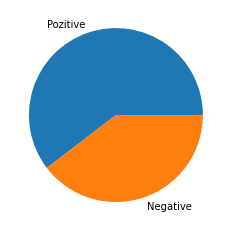

In [38]:
counts = np.array([pozitive_count,negative_count])
mylabels = ["Pozitive", "Negative"]
print(search_words.split(" ")[0]+"  Tweets Sentiment Rate")
plt.pie(counts, labels = mylabels)
plt.show() 